In [11]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.options.display.max_colwidth = 500

import warnings
warnings.filterwarnings('ignore')

In [12]:
#Read the files into a dataframe
train=pd.read_csv(r'C:\Users\dravi\Desktop\Lenovo backup\swathi\Flip Robo\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\train.csv')
test=pd.read_csv(r'C:\Users\dravi\Desktop\Lenovo backup\swathi\Flip Robo\Malignant-Comments-Classifier-Project\Malignant Comments Classifier Project\test.csv')

# EDA

In [13]:
train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess t...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. · talk """,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0,0,0,0,0,0
8,00037261f536c51d,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0,0,0,0,0,0


In [14]:
test.head(10)

,id,comment_text
0,00001cee341fdb12,"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"
1,0000247867823ef7,"== From RfC == \n\n The title is fine as it is, IMO."
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lapland — / """
3,00017563c3f7919a,":If you have a look back at the source, the information I updated was the correct form. I can only guess the source hadn't updated. I shall update the information once again but thank you for your message."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very highly of you and would not revert without discussion.
6,00024115d4cbde0f,"Please do not add nonsense to Wikipedia. Such edits are considered vandalism and quickly undone. If you would like to experiment, please use the sandbox instead. Thank you. -"
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. \n The correct number lies between 10 000 to 15 000. \n Ponder the numbers carefully. \n\n This error will persist for a long time as it continues to reproduce... The latest reproduction I know is from ENCYCLOPÆDIA BRITANNICA ALMANAC 2008 wich states \n Magnittude: 8.7 (fair enough) \n victims: 70 000 (today 10 000 to 15 000 is not """"a lot"""" so I guess people just come out with a number that impresses enough, I don't know. But I know this: it's ..."
9,00026d1092fe71cc,"== Double Redirects == \n\n When fixing double redirects, don't just blank the outer one, you need edit it to point it to the final target, unless you think it's inappropriate, in which case, it needs to be nominated at WP:RfD"


In [15]:
train.shape

(159571, 8)

In [16]:
test.shape

(153164, 2)

# Data Visualisation

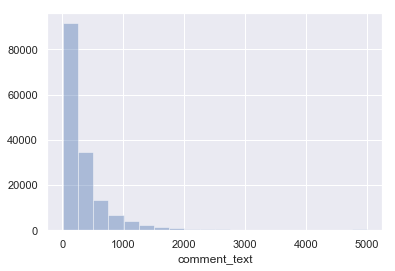

In [17]:
lenofcomment=train.comment_text.str.len()
sns.set()
sns.distplot(lenofcomment,bins=20,kde=False)


Most of the comments are short with only a few longer than 1000 words

In [18]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [19]:
train[['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']].sum()


malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

It can be seen that there is much imbalance in the dataset.

In [10]:
from nltk.stem import WordNetLemmatizer
lemma= WordNetLemmatizer()
import string
def cleaning(text):
    text=text.lower()
    tokens=word_tokenize(text)
    no_punctext=[w for w in tokens if w not in string.punctuation]
    words=[w for w in no_punctext if w.isalpha()]
    words=[w for w in words if w not in stopwords.words('english')]
    cleanwords=[lemma.lemmatize(w) for w in words]
    cleantext=' '.join(cleanwords)
    return cleantext
    

In [11]:
for i in range(len(train['comment_text'])):
    train['comment_text'][i]=cleaning(train['comment_text'][i])

In [25]:
for i in range(len(test['comment_text'])):
    test['comment_text'][i]=cleaning(test['comment_text'][i])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
x=vect.fit_transform(train['comment_text'])

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
test=vect.fit_transform(test['comment_text'])

In [ ]:
from scipy import sparse
sparse.save_npz("x.npz", x)
sparse.save_npz("x_test.npz", test)

In [22]:
from scipy import sparse
x=sparse.load_npz("x.npz")
test=sparse.load_npz("x_test.npz")

In [23]:
y=train.iloc[:,2:-1].sum(axis=1)

In [27]:
y.value_counts(normalize=True)

0    0.898660
1    0.040565
3    0.029122
2    0.021996
4    0.009062
5    0.000595
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [26]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
pred=mnb.predict(x_test)
print('accuracy score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score: 0.9005681818181818
[[43014     7     0     0     0     0]
 [ 1940     0     0     2     0     0]
 [ 1046     0     0     7     0     0]
 [ 1296     0     0    98     0     0]
 [  315     2     0   117     0     0]
 [   23     0     0     5     0     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     43021
           1       0.00      0.00      0.00      1942
           2       0.00      0.00      0.00      1053
           3       0.43      0.07      0.12      1394
           4       0.00      0.00      0.00       434
           5       0.00      0.00      0.00        28

    accuracy                           0.90     47872
   macro avg       0.22      0.18      0.18     47872
weighted avg       0.82      0.90      0.86     47872



In [30]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print('confusion matrix \n',confusion_matrix(y_test,pred))
print('\n classification report \n',classification_report(y_test,pred))

accuracy score 0.9034717580213903
confusion matrix 
 [[42980    27     7     6     0     1]
 [ 1857    39    24    21     1     0]
 [  924    32    48    34    12     3]
 [ 1135    22    61   138    38     0]
 [  299     3    19    67    44     2]
 [   18     0     1     3     4     2]]

 classification report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     43021
           1       0.32      0.02      0.04      1942
           2       0.30      0.05      0.08      1053
           3       0.51      0.10      0.17      1394
           4       0.44      0.10      0.17       434
           5       0.25      0.07      0.11        28

    accuracy                           0.90     47872
   macro avg       0.46      0.22      0.25     47872
weighted avg       0.86      0.90      0.87     47872



Dataset is severely imbalanced and Accuracy would not be the appropriate metric to choose the best model. ROC_AUC Curve would be a better metric
to compare the performance of the models. ROC_AUC Curve is a straight forward process for binary label, but in this case the label is
a multi class. I have to explore further the methods of constructing ROC curves for multi class classification.

Instead of converting the multi label to a single columnn by adding the multi label columns, I tried multilearn Scikit and LabelPowerset
keeping the multilabel columns  as it is i.e y is of multiple columns. Memory error occured due to huge data sets.Given below is the code.

In [ ]:
#from skmultilearn.model_selection import iterative_train_test_split
#x_train,x_test,y_train,y_test=iterative_train_test_split(x,y.values,test_size=0.3)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from skmultilearn.problem_transform import LabelPowerset
#from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
#model=LabelPowerset(LogisticRegression())
#model.fit(x_train,y_train)
#pred=model.predict(x_test)
#print('accuracy score:',accuracy_score(y_test,pred))